<a href="https://colab.research.google.com/github/PraveenAnanth5451/Deep_Learning_Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"praveenananth","key":"3bb91d2a88b1305405a80f8d226baa9f"}'}

In [3]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
!ls

 anaaaaaa.jpg   face-mask-dataset.zip   istockphoto-1503232125-612x612.jpg   kaggle.json
 data	       'images (1).jpeg'       'kaggle (1).json'		     sample_data
 drive	       'images (2).jpeg'       'kaggle (2).json'


**Importing the Dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [8]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])

['with_mask_860.jpg', 'with_mask_1730.jpg', 'with_mask_1478.jpg', 'with_mask_368.jpg', 'with_mask_313.jpg']


In [9]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])

['without_mask_2379.jpg', 'without_mask_470.jpg', 'without_mask_2745.jpg', 'without_mask_2569.jpg', 'without_mask_280.jpg']


In [10]:
len(with_mask_files), len(without_mask_files)

(3725, 3828)

**Creating Labels for the two class of Images**

With Mask ---> 1

Without Mask ---> 0

In [11]:
# Create a label
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [12]:
with_mask_labels[0:5], without_mask_labels[0:5]

labels = with_mask_labels + without_mask_labels
labels[0:5]

[1, 1, 1, 1, 1]

In [13]:
labels[-5:], len(labels)

([0, 0, 0, 0, 0], 7553)

**Displaying the images**

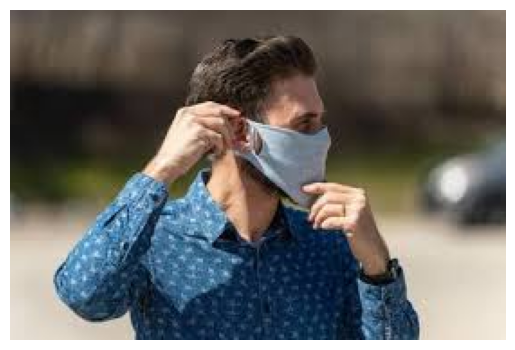

In [14]:
# Displaying the mask image
img = mpimg.imread("/content/data/with_mask/with_mask_2590.jpg")
imgplot = plt.imshow(img)
plt.axis(False)
plt.show()

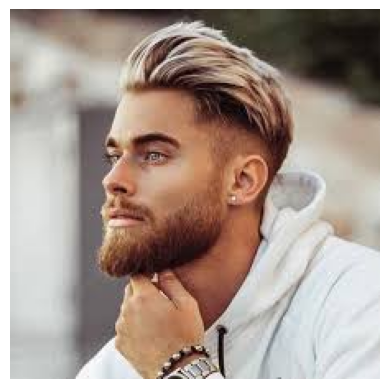

In [15]:
# Displaying the mask without mask
img = mpimg.imread("/content/data/without_mask/without_mask_2590.jpg")
imgplot = plt.imshow(img)
plt.axis(False)
plt.show()

**Image Preocessing**

1. Resize the images
2. Convert the Images into numpy array

In [16]:
# Convert the  images to numpy array

with_mask_path = "/content/data/with_mask/"
data = []
without_mask_path = "/content/data/without_mask/"

for img_file in with_mask_files:
  img = Image.open(with_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert("RGB")
  img = np.array(img)
  data.append(img)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
for img_file in without_mask_files:
  img = Image.open(without_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert("RGB")
  img = np.array(img)
  data.append(img)

In [18]:
len(data)

7553

array([[[33, 31, 34],
        [33, 31, 34],
        [33, 31, 34],
        ...,
        [25, 25, 27],
        [25, 25, 27],
        [25, 25, 27]],

       [[34, 32, 35],
        [34, 32, 35],
        [34, 32, 35],
        ...,
        [26, 26, 28],
        [25, 25, 27],
        [25, 25, 27]],

       [[35, 33, 36],
        [35, 33, 36],
        [35, 33, 36],
        ...,
        [27, 27, 29],
        [26, 26, 28],
        [25, 25, 27]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]]], dtype=uint8)
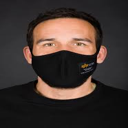

In [19]:
data[0]

In [20]:
# Converting image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [21]:
X.shape

(7553, 128, 128, 3)

In [22]:
y.shape

(7553,)

**Train Test Split**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3))

In [25]:
y_train.shape, y_test.shape

((6042,), (1511,))

In [26]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

**Building a Convolutional Neural Network**

In [27]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import tensorflow.keras.layers as Dense
from tensorflow.keras.applications.resnet50 import ResNet50

In [28]:
model = Sequential()
model.add(layers.Input(shape = (128,128,3)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

In [29]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = "adam", metrics = ["accuracy"])

In [30]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.6354 - loss: 0.7704 - val_accuracy: 0.8413 - val_loss: 0.3496
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8543 - loss: 0.3629 - val_accuracy: 0.9041 - val_loss: 0.2641
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8844 - loss: 0.3004 - val_accuracy: 0.9008 - val_loss: 0.2373
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9041 - loss: 0.2590 - val_accuracy: 0.9190 - val_loss: 0.1941
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9164 - loss: 0.2154 - val_accuracy: 0.9207 - val_loss: 0.1882
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9129 - loss: 0.2223 - val_accuracy: 0.9157 - val_loss: 0.3025
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9354 - loss: 0.1798 - val_accuracy: 0.9273 - val_loss: 0.2005
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9449 - loss: 0.1631 - val_

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9315 - loss: 0.2176


(0.2244754135608673, 0.9225678443908691)

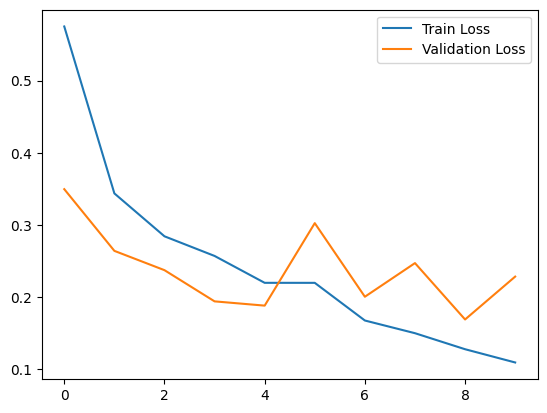

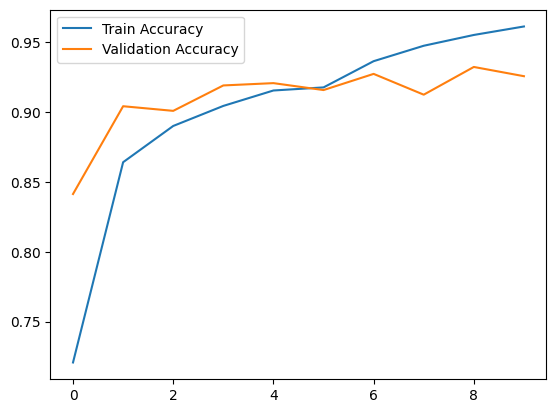

In [32]:
h = history

# plot the loss value
plt.plot(h.history["loss"], label = "Train Loss")
plt.plot(h.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# plot the Accuracy value
plt.plot(h.history["accuracy"], label = "Train Accuracy")
plt.plot(h.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

**Predictive System**

In [41]:
def Prediction(img_path):
    img = cv2.imread(img_path)
    cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))  # Ensure it matches the input size
    img = img / 255.0  # Normalize
    img = np.reshape(img, (1, 128, 128, 3))  # Add batch dimension

    pred = model.predict(img)
    print(f"Prediction (Raw Output): {pred}")  # Print to debug

    if pred[0][0] >= 0.5:
        print("Wearing Mask")
    else:
        print("Not Wearing Mask")


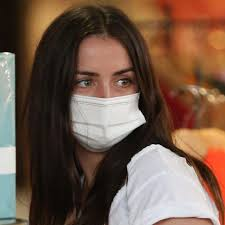

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction (Raw Output): [[0.9985066]]
Wearing Mask


In [42]:
Prediction("/content/images (1).jpeg")

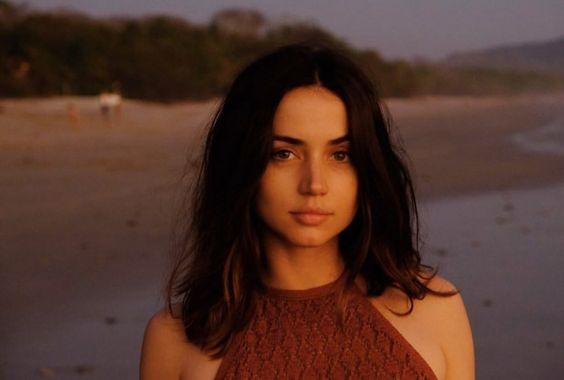

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction (Raw Output): [[0.08875182]]
Not Wearing Mask


In [49]:
Prediction("/content/anaaaaaa.jpg")

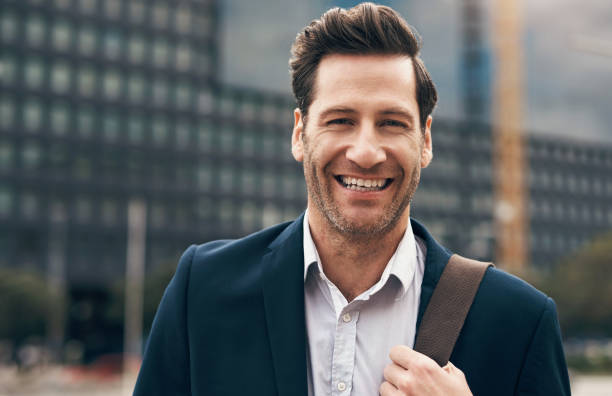

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction (Raw Output): [[0.25039744]]
Not Wearing Mask


In [44]:
Prediction("/content/istockphoto-1503232125-612x612.jpg")